## Linear Regression with 'Stochastic Gradient Descent'

In [164]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import time

In [165]:
# Generating some data
np.random.seed(42)
m = 100000
X = 1 * np.random.rand(m, 1) # column vector
y = 5 + 4 * X + np.random.randn(m, 1) # column vector | y = 5 + 4x + noise

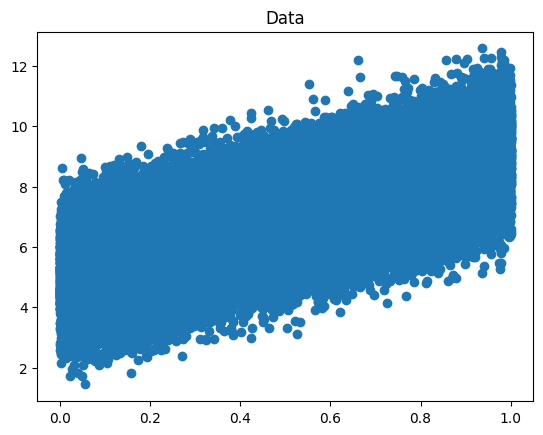

In [166]:
# Visualizing this data
plt.scatter(X, y)
plt.title("Data")
plt.show()

In [167]:
# Define a function to compute the params -> 'SGD'
def fit(X, y, *, learning_rate=0.1, n_epochs=1000):
    # Random init
    weights = np.random.randn(X.shape[1])
    bias = 0

    # Loss over training
    costs = []
    epochs = []

    for epoch in range(n_epochs):
        random_index = np.random.randint(m)
        xi = X[random_index]
        yi = y[random_index]
        y_pred = xi @ weights + bias
        error = y_pred - yi
        w_grad = 2 * xi.T @ error
        b_grad = 2 * error

        print(f"Weights: {weights} - Bias: {bias} | Epoch: {epoch}")

        weights = weights - learning_rate * w_grad
        bias = bias - learning_rate * b_grad

        if epoch % 10 == 0:
            loss = np.mean((yi - y_pred)**2)
            costs.append(loss)
            epochs.append(epoch)

    print(f"Final Results: {weights}, {bias}")
    return weights, bias, costs, epochs

Weights: [2.07190122] - Bias: 0 | Epoch: 0
Weights: [2.13579424] - Bias: [0.10805554] | Epoch: 1
Weights: [2.13744789] - Bias: [0.21221494] | Epoch: 2
Weights: [2.16933339] - Bias: [0.30260949] | Epoch: 3
Weights: [2.2731507] - Bias: [0.43553084] | Epoch: 4
Weights: [2.37078234] - Bias: [0.56775033] | Epoch: 5
Weights: [2.47715448] - Bias: [0.69182485] | Epoch: 6
Weights: [2.48010155] - Bias: [0.80427732] | Epoch: 7
Weights: [2.52794785] - Bias: [0.89767925] | Epoch: 8
Weights: [2.55502354] - Bias: [0.98831657] | Epoch: 9
Weights: [2.58877425] - Bias: [1.0987054] | Epoch: 10
Weights: [2.63749964] - Bias: [1.19394346] | Epoch: 11
Weights: [2.64780044] - Bias: [1.2481938] | Epoch: 12
Weights: [2.65839869] - Bias: [1.33235169] | Epoch: 13
Weights: [2.73610516] - Bias: [1.42765587] | Epoch: 14
Weights: [2.73901584] - Bias: [1.44310577] | Epoch: 15
Weights: [2.77281271] - Bias: [1.53614464] | Epoch: 16
Weights: [2.79148628] - Bias: [1.6066016] | Epoch: 17
Weights: [2.86937436] - Bias: [1.69

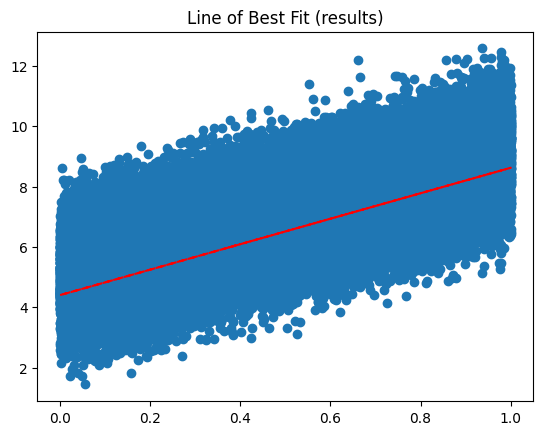

In [168]:
# Call the fit function
weights, bias, costs, epochs = fit(X, y, learning_rate=0.01, n_epochs=100)
print(f"Weights: {weights}, Bias: {bias}")

# Define a function for preds
def predict(X):
    return X @ weights + bias

# Make some preds
preds = predict(X)

# Re-generate the data
np.random.seed(42)
m = 100000
X = 1 * np.random.rand(m, 1) # column vector
y = 5 + 4 * X + np.random.randn(m, 1) # column vector | y = 5 + 4x + noise

# Visualize the results
plt.scatter(X, y)
plt.plot(X, preds, 'r--')
plt.title("Line of Best Fit (results)")
plt.show()

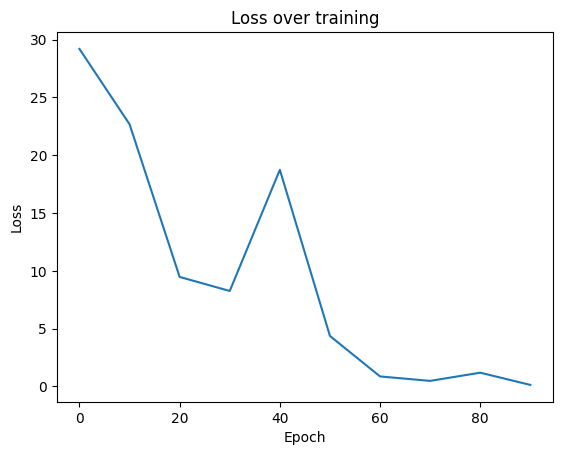

In [169]:
# Plot loss over training
plt.plot(epochs, costs)
plt.title("Loss over training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [170]:
# Define a function wrapper to compare runtimes
def log_time(func):
    def wrapper(self, *args, **kwargs):
        start_time = time.time()
        result = func(self, *args, **kwargs)
        end_time = time.time()
        print(f"The runtime for {func.__name__}: {end_time - start_time:.4f}")
        return result
    return wrapper

In [171]:
# Define the Batch Gradient Descent (BGD) class
class BGD:
    # Initialize the class with learning rate, number of epochs, weights, bias, and history
    def __init__(self, learning_rate=0.1, n_epochs=1000):
        self.learning_rate_ = learning_rate
        self.n_epochs_ = n_epochs
        self.weights = None
        self.bias = None 
        self.history = []

    # Define the prediction method: y = mx + b
    def predict(self, X):
        return X @ self.weights + self.bias
    
    # Define the Mean Squared Error (MSE) method
    def MSE(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    # Define the fit method to train the model
    @log_time
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.randn(n, 1)
        self.bias = 0

        # Perform gradient descent for the specified number of epochs (BGD)
        for epoch in range(self.n_epochs_):
            y_pred = self.predict(X)
            error = y - y_pred
            w_grad = -2/m * X.T @ error
            b_grad = -2/m * np.sum(error)
            self.weights = self.weights - self.learning_rate_ * w_grad
            self.bias = self.bias - self.learning_rate_ * b_grad

            # Calculate the loss and append the weights, bias, and loss to the history
            loss = self.MSE(y, y_pred)
            self.history.append((self.weights.copy(), self.bias, loss))

        return self.weights, self.bias
    
    # Define a method to plot the contour of the MSE and the path of the weights and bias
    def plot_contour(self, X, y):
        w_range = np.linspace(-10, 10, 100)
        b_range = np.linspace(-10, 10, 100)
        W, B = np.meshgrid(w_range, b_range)
        Z = np.zeros_like(W)

        # Calculate the MSE for each combination of weights and bias
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                y_pred = X @ np.array([[W[i, j]]]) + B[i, j]
                Z[i, j] = self.MSE(y, y_pred)

        # Plot the contour of the MSE
        plt.contour(W, B, Z, levels=50, cmap='viridis')
        plt.colorbar(label="Mean Squared Error")

        # Plot the path of the weights and bias
        weights, biases, _ = zip(*self.history)
        weights = np.array(weights).flatten() 
        plt.plot(weights, biases, marker='o', color='red', markersize=5, linewidth=1, label='Path')
        plt.title(f"BGD: Path to Convergence")
        plt.xlabel("Weight")
        plt.ylabel("Bias")
        plt.legend()
        plt.show()

The runtime for fit: 1.1734
Weights: [[4.00573484]], Bias: 4.999751314360065


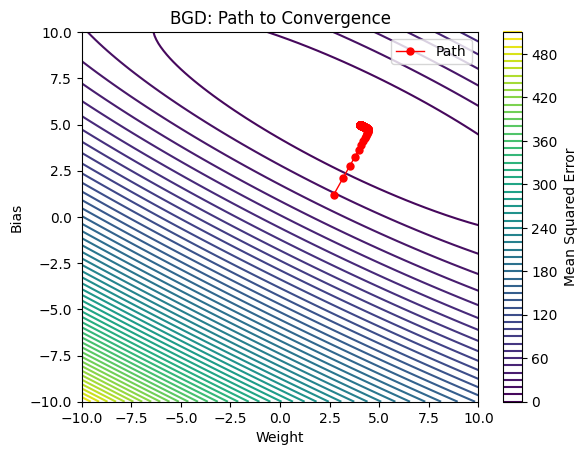

In [172]:
# Create an instance
bgd_res = BGD()
weights, bias = bgd_res.fit(X, y)
print(f"Weights: {weights}, Bias: {bias}")
bgd_res.plot_contour(X, y)

In [173]:
# Define the Stochastic Gradient Descent (SGD) class
class SGD:
    # Initialize the class with learning rate, number of epochs, weights, bias, and history
    def __init__(self, learning_rate=0.1, n_epochs=1000):
        self.learning_rate_ = learning_rate
        self.n_epochs_ = n_epochs
        self.weights = None
        self.bias = None
        self.history = []

    # Define the prediction method: y = mx + b
    def predict(self, X):
        return X @ self.weights + self.bias
    
    # Define the Mean Squared Error (MSE) method
    def MSE(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    # Define the fit method to train the model
    @log_time
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.randn(n)
        self.bias = 0

        # Perform stochastic gradient descent for the specified number of epochs
        for epoch in range(self.n_epochs_):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            y_pred = self.predict(xi)
            error = y_pred - yi
            w_grad = 2 * xi @ error
            b_grad = 2 * error.item()
            self.weights = self.weights - self.learning_rate_ * w_grad
            self.bias = self.bias - self.learning_rate_ * b_grad

            # Calculate the loss and append the weights, bias, and loss to the history
            loss = self.MSE(yi, y_pred)
            self.history.append((self.weights[0, 0].copy(), self.bias, loss))
        
        return self.weights, self.bias

    # Define a method to plot the contour of the MSE and the path of the weights and bias
    def plot_contour(self, X, y):
        w_range = np.linspace(-10, 10, 100)
        b_range = np.linspace(-10, 10, 100)
        W, B = np.meshgrid(w_range, b_range)
        Z = np.zeros_like(W)

        # Calculate the MSE for each combination of weights and bias
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                y_pred = X @ np.array([[W[i, j]]]) + B[i, j]
                Z[i, j] = self.MSE(y, y_pred)

        # Plot the contour of the MSE
        plt.contour(W, B, Z, levels=50, cmap='viridis')
        plt.colorbar(label="Mean Squared Error")

        # Plot the path of the weights and bias
        weights, biases, _ = zip(*self.history)
        weights = np.array(weights).flatten() 
        plt.plot(weights, biases, marker='o', color='red', markersize=5, linewidth=1, label='Path')
        plt.title(f"SGD: Path to Convergence")
        plt.xlabel("Weight")
        plt.ylabel("Bias")
        plt.legend()
        plt.show()

The runtime for fit: 0.2465
Weights: [[3.81068811]], Bias: 4.999751314360065


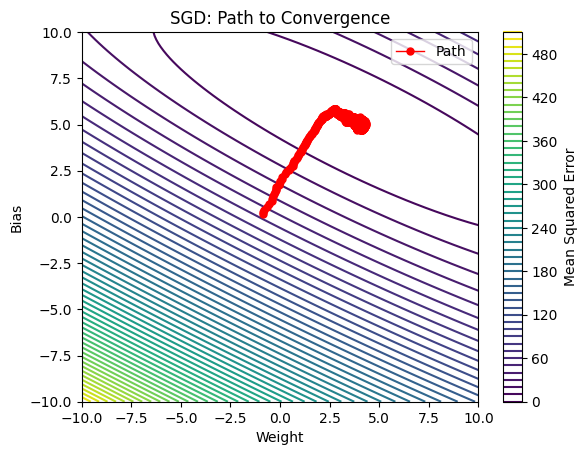

In [174]:
# Create an instance
sgd_res = SGD(learning_rate=0.01, n_epochs=10000)
weights, biases = sgd_res.fit(X, y)
print(f"Weights: {weights}, Bias: {bias}")
sgd_res.plot_contour(X, y)